In [5]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import shutil
%matplotlib inline

In [16]:
DATASET = ''
ROOT_DIR = '/plate-detector/'
DATA_DIR = ROOT_DIR + 'data/'
IMGS_DIR = DATA_DIR + 'MIXED_DATASET/imgs/'
ANNS_DIR = DATA_DIR + 'MIXED_DATASET/anns/'

In [17]:
## Transformateur de structure de la base de données OPEN IMAGES 

# ANNS = os.listdir(ANNS_DIR)
# i = 0
# for ann in ANNS:
#     try:
#         contenu = ''
#         with open(ANNS_DIR + '/' + ann, mode = 'r') as file:
#             img = cv2.imread(IMGS_DIR + '/' + ann[:-3] + 'jpg')
#             h, w = img.shape[:2]
#             for line in file:
#                 obj, xmin, xmax, ymin, ymax = line[:-1].split(',')
#                 xmin, xmax, ymin, ymax = int(float(xmin)*w), int(float(xmax)*w), int(float(ymin)*h), int(float(ymax)*h)
#                 contenu += 'Plate,{},{},{},{},{},{}\n'.format(ymin, xmin, ymax, xmax, h, w)
#             #print(contenu)
#         with open(ANNS_DIR + '/' + ann, mode = 'w') as file:
#             file.write(contenu)
#     except:
#         print(ann)
#         pass
#     i += 1
# print(i)

In [18]:
# Echantillonneur des bases de données  

# DATA_DIR1 = ROOT_DIR + 'Deep_Learning/data/' + DATASET[:-1] + '_RESIZED/'
# IMGS_DIR1 = DATA_DIR1 + 'imgs/'
# ANNS_DIR1 = DATA_DIR1 + 'anns/'
# for DIR in [DATA_DIR1, ANNS_DIR1, IMGS_DIR1]:
#     shutil.rmtree(DIR, ignore_errors=True)
#     os.makedirs(DIR)

# ANNS = os.listdir(ANNS_DIR)
# IMGS = os.listdir(IMGS_DIR)

# i = 0
# for img_name in IMGS:
#     try:
#         img = cv2.imread(IMGS_DIR + img_name)
#         h, w = img.shape[:2]
        
#         div_h = 1
#         div_w = 1
#         while h / div_h > 64 :
#             div_h += 1
#         while w / div_w > 128 :
#             div_w += 1
#         div = max(div_h, div_w)
#         img = cv2.resize(img, (w // div, h // div))
        
#         cv2.imwrite(IMGS_DIR1 + img_name, img)
#         contenu = ''
#         with open(ANNS_DIR + img_name[:-3] + 'txt', mode = 'r') as file:
#             for line in file:
#                 obj, ymin, xmin, ymax, xmax, h, w = line[:-1].split(',')
#                 xmin, xmax, ymin, ymax, h, w= int(xmin)//div, int(xmax)//div, int(ymin)//div, int(ymax)//div, int(h)//div, int(w)//div
#                 contenu += '{},{},{},{},{},{},{}\n'.format(obj,ymin, xmin, ymax, xmax, h, w)
#             #print(contenu)
#         with open(ANNS_DIR1 + img_name[:-3] + 'txt', mode = 'w') as file:
#             file.write(contenu)
#     except:
#         print(ann)
#         pass
#     i += 1
# print(i)

In [25]:
def parse_annotation(anns_dir, imgs_dir):
    all_imgs = []
    seen_labels = {}
    for img_ in sorted(os.listdir(imgs_dir)):

        img = {'object' : []}
        img_name = imgs_dir + img_
        ann_name = anns_dir + img_[:-3] + 'txt'
        if img_ == '.ipynb_checkpoints':
            continue
        img['file_name'] = img_name
        with open(ann_name, mode = 'r') as file:
            for line in file:
                obj = {'name' : ''} # {'name' : '', 'ymin' : , 'xmin' : , 'ymax' : , 'xmax' : }
                name, ymin, xmin, ymax, xmax, height, width = line[:-1].split(',')
                obj['name'] = name
                obj['ymin'], obj['xmin'], obj['ymax'], obj['xmax'] = int(ymin), int(xmin), int(ymax), int(xmax)
                img['height'], img['width'] = int(height), int(width)
                img['object'] += [obj]

                if not obj['name'] in seen_labels:
                    seen_labels[obj['name']] = 1
                else:
                    seen_labels[obj['name']] += 1
    
        all_imgs += [img]
    return all_imgs, seen_labels

Le nombre d'images trouvées dans la base de données MIXED_DATASET/ est : 952
Les objets annotées dans cette base de données sont : {'Plate': 1046}


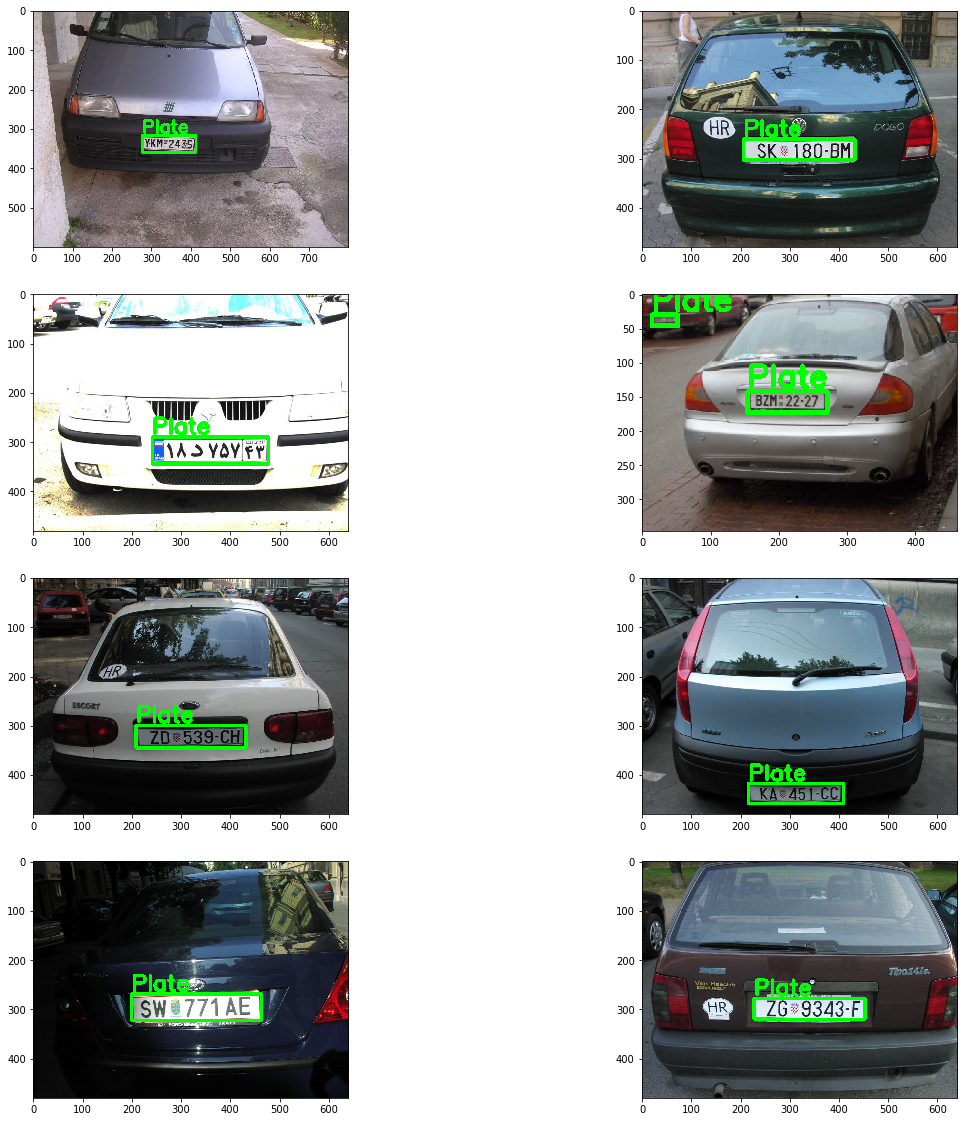

In [28]:
# Visualisation des images d'une base de données annotées

all_imgs, seen_labels = parse_annotation(ANNS_DIR, IMGS_DIR)
np.random.shuffle(all_imgs)
print('Le nombre d\'images trouvées dans la base de données {} est : {}'.format(DATASET, len(all_imgs)))
print('Les objets annotées dans cette base de données sont :', seen_labels)

fig=plt.figure(figsize=(20, 20))
columns = 2
rows = 4
for i in range(1, columns*rows +1):
    numb = np.random.randint(len(all_imgs))
    rand_img = cv2.imread(all_imgs[numb]['file_name'])
    rand_img = cv2.cvtColor(rand_img, cv2.COLOR_BGR2RGB)
    for j in range(len(all_imgs[numb]['object'])) :
        min_labels = (all_imgs[numb]['object'][j]['xmin'], all_imgs[numb]['object'][j]['ymin'])
        max_labels = (all_imgs[numb]['object'][j]['xmax'], all_imgs[numb]['object'][j]['ymax'])
        cv2.rectangle(rand_img, min_labels, max_labels, (0,255,0), 5)
        cv2.putText(rand_img, 
                    all_imgs[numb]['object'][j]['name'], 
                    (min_labels[0], min_labels[1] - 7), 
                    cv2.FONT_HERSHEY_SIMPLEX, 
                    0.5e-2 * 300, 
                    (0,255,0), 5)
    fig.add_subplot(rows, columns, i)
    plt.imshow(rand_img)  
plt.show()